In [1]:
#Note for psplt.plot_complex_density_matrix() to properly plot you will need to comment out the following from pulsee.plot source code: 
#idx, = np.where(abs(dm_data) < 0.001)
#dm_data[idx] = abs(dm_data[idx])

In [2]:
import numpy as np
import qutip as qt
import pulsee.plot as psplt
import operators as op # "import *" is bad Python practice, but simplest way to do some math
from sympy import symbols, Matrix, nsimplify

# Calculating thermal state density matrix

In [3]:
# Define symbolic constants
hbar, w1, w2, k_b, T, = symbols('hbar w1 w2 k_b T')

# Extract the numerical matrix from the Qobj as a NumPy array
op.Iz_numpy = op.Iz.full()
op.Sz_numpy = op.Sz.full()
op.identity_numpy = op.IDENTITY.full()
# Convert the NumPy array to a SymPy Matrix
op.Iz_sympy = Matrix(op.Iz_numpy)
op.Sz_sympy = Matrix(op.Sz_numpy)
op.identity_sympy = Matrix(op.identity_numpy)

thermal_density_matrix=(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
#spin dynamics pg 391
#thermal_state = thermal_state.applyfunc(Rational)
display(thermal_density_matrix_simple)
#qutip_matrix = Qobj(numerical_matrix)   # Create the Qobj from the numerical matrix

# Display the Qobj matrix
#print("The resulting Qobj matrix is:")
#print(qutip_matrix)

Matrix([
[1/4 + hbar*w1/(8*T*k_b) + hbar*w2/(8*T*k_b),                                           0,                                           0,                                           0],
[                                          0, 1/4 + hbar*w1/(8*T*k_b) - hbar*w2/(8*T*k_b),                                           0,                                           0],
[                                          0,                                           0, 1/4 - hbar*w1/(8*T*k_b) + hbar*w2/(8*T*k_b),                                           0],
[                                          0,                                           0,                                           0, 1/4 - hbar*w1/(8*T*k_b) - hbar*w2/(8*T*k_b)]])

Matrix([
[250001495822767/1000000000000000,   0,   0,                                0],
[                               0, 1/4,   0,                                0],
[                               0,   0, 1/4,                                0],
[                               0,   0,   0, 249998504177233/1000000000000000]])

findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.


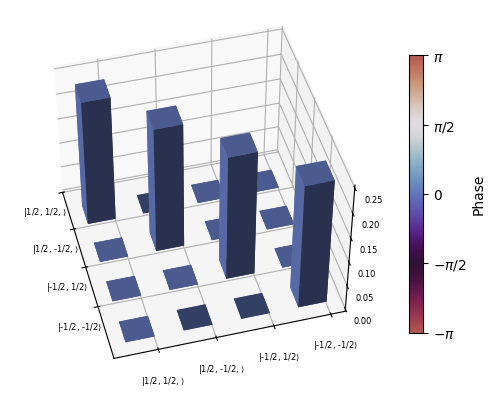

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [4]:
hbar = 1.054571817*10**-34 #J*s
w1 = 242.9516595*10**6 #s^-1
w2 = 242.9507284*10**6 #s^-1
k_b = 1.380649*10**-23 #J*K^−1
T = 310.15 #K
thermal_density_matrix=(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
display(thermal_density_matrix_simple)

# Convert SymPy matrix to NumPy array
numpy_matrix = np.array(thermal_density_matrix).astype(np.complex128)
# Convert NumPy array to Qobj
thermal_density_matrix_Qobj= qt.Qobj(numpy_matrix, dims=[[2, 2], [2, 2]])
psplt.plot_complex_density_matrix(thermal_density_matrix_Qobj)

# Calculating thermal state deviation density matrix

In [5]:
hbar, w1, w2, k_b, T, = symbols('hbar w1 w2 k_b T')
thermal_density_matrix =(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
thermal_deviation_density_matrix = thermal_density_matrix_simple - op.identity_sympy/4
display(thermal_deviation_density_matrix)

Matrix([
[hbar*w1/(8*T*k_b) + hbar*w2/(8*T*k_b),                                     0,                                      0,                                      0],
[                                    0, hbar*w1/(8*T*k_b) - hbar*w2/(8*T*k_b),                                      0,                                      0],
[                                    0,                                     0, -hbar*w1/(8*T*k_b) + hbar*w2/(8*T*k_b),                                      0],
[                                    0,                                     0,                                      0, -hbar*w1/(8*T*k_b) - hbar*w2/(8*T*k_b)]])

Matrix([
[1.49582276698368e-6, 0, 0,                    0],
[                  0, 0, 0,                    0],
[                  0, 0, 0,                    0],
[                  0, 0, 0, -1.49582276701143e-6]])

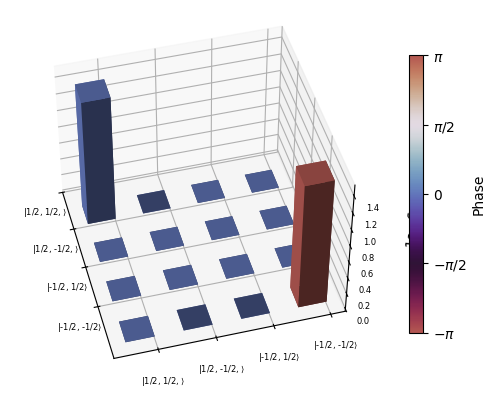

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [6]:
hbar = 1.054571817*10**-34 #J*s
w1 = 242.9516595*10**6 #s^-1
w2 = 242.9507284*10**6 #s^-1
k_b = 1.380649*10**-23 #J*K^−1
T = 310.15 #K
thermal_density_matrix=(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
thermal_deviation_density_matrix = thermal_density_matrix_simple - op.identity_sympy/4
display(thermal_deviation_density_matrix)

# Convert SymPy matrix to NumPy array
numpy_matrix = np.array(thermal_deviation_density_matrix).astype(np.complex128)
# Convert NumPy array to Qobj
thermal_deviation_density_matrix_Qobj= qt.Qobj(numpy_matrix, dims=[[2, 2], [2, 2]])
psplt.plot_complex_density_matrix(thermal_deviation_density_matrix_Qobj)
#There seems to be an psplt.plot_complex_density_matrix() error here as the second term should be red!
#psplt.plot_complex_density_matrix(op.Iz + op.Sz)
#display(op.Iz + op.Sz)
#display(thermal_deviation_density_matrix)

In [7]:
(hbar*w1/(k_b*T))

5.983302532224574e-06

# Pure Density Matrix

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

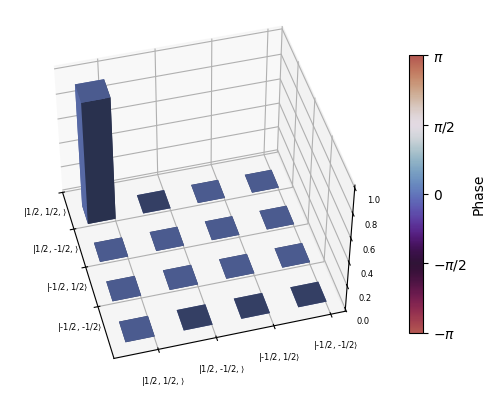

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
rho_1000 = qt.Qobj([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0],  [0, 0, 0, 0]], dims=[[2, 2], [2, 2]])
display(rho_1000)
psplt.plot_complex_density_matrix(rho_1000)
print(rho_1000)

# Pseudo-Pure Density Matrix

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.2500015 0.        0.        0.       ]
 [0.        0.2499995 0.        0.       ]
 [0.        0.        0.2499995 0.       ]
 [0.        0.        0.        0.2499995]]

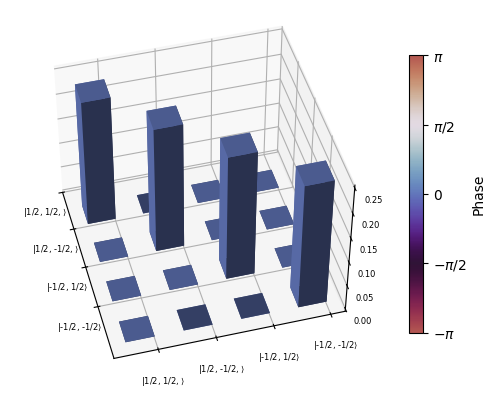

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.2500015 0.        0.        0.       ]
 [0.        0.2499995 0.        0.       ]
 [0.        0.        0.2499995 0.       ]
 [0.        0.        0.        0.2499995]]


In [9]:
c=1/12*(hbar*w1/(k_b*T)) #see thesis for calculation of this term
rho_1000_pseudo_pure_temporal = (1/4-c)*op.IDENTITY+4*c*qt.Qobj([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0],  [0, 0, 0, 0]], dims=[[2, 2], [2, 2]])
display(rho_1000_pseudo_pure_temporal)
psplt.plot_complex_density_matrix(rho_1000_pseudo_pure_temporal)
print(rho_1000_pseudo_pure_temporal)

# Pseudo-Pure Deviation Density Matrix

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.19333031e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]

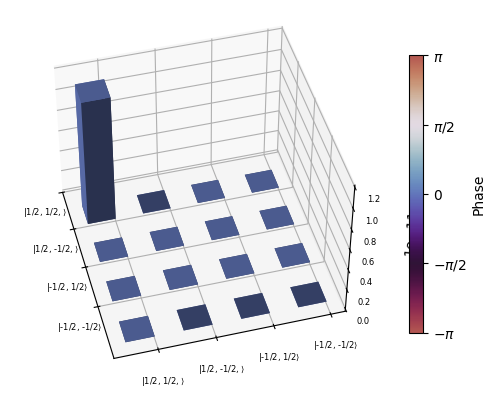

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [10]:
rho_1000_pseudo_pure_temporal_deviation = 4*c*(hbar*w1/(k_b*T))*qt.Qobj([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0],  [0, 0, 0, 0]], dims=[[2, 2], [2, 2]])
display(rho_1000_pseudo_pure_temporal_deviation)
psplt.plot_complex_density_matrix(rho_1000_pseudo_pure_temporal_deviation)

# A Seperable Basis for an Entangled Pseudo-Pure State

$$
\chi = \varepsilon \ket{\Phi^+} \bra{\Phi^+} + (1 - \varepsilon) \frac{I}{4}$$

In [11]:
Phi_plus_density_matrix = 1/2*qt.Qobj([[1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0],  [1, 0, 0, 1]], dims=[[2, 2], [2, 2]])

In [12]:
Phi_plus_density_matrix

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]

In [13]:
from IPython.display import Markdown

def display_high_precision(matrix):
    formatted_matrix = "\n".join(["[" + ", ".join([f"{elem:.10f}" for elem in row]) + "]" for row in matrix])
    display(Markdown(f"```\n{formatted_matrix}\n```"))
    
epsilon=1/3*(hbar*w1/(k_b*T))    #this would not be the real pislon after transformations, but close enough
Chi=(epsilon)*Phi_plus_density_matrix + (1-epsilon)*1/4*op.IDENTITY

from IPython.display import display
np.set_printoptions(precision=15, suppress=False)
Chi = Chi.full()
# Custom display function to format the matrix with more significant figures


# Use the custom display function to show the matrix
display_high_precision(Chi)

```
[0.2500004986+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000009972+0.0000000000j]
[0.0000000000+0.0000000000j, 0.2499995014+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j]
[0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j, 0.2499995014+0.0000000000j, 0.0000000000+0.0000000000j]
[0.0000009972+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j, 0.2500004986+0.0000000000j]
```

In [14]:
#There is no way to get off-diagnoal terms from a classical system. Also 

In [15]:
#Chi_simulate=0.25*∣00⟩⟨00∣+0.25*∣01⟩⟨01∣+0.25*∣10⟩⟨10∣+0.25*∣11⟩⟨11∣+0.0000004986*(∣00⟩⟨00∣+∣11⟩⟨11∣)+0.0000009972*(∣00⟩⟨11∣+∣11⟩⟨00∣)

### The below was calcualted using chat gpt 01-mini with a prompt similar to 

"i have a density matrix and i would like to tell if it is seperable. can you approximatly factor it into seperable quantum states? you can approximate but be sure to keep the off-diagnoal compoents.     :[0.2500004986+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000009972+0.0000000000j]
[0.0000000000+0.0000000000j, 0.2499995014+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j]
[0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j, 0.2499995014+0.0000000000j, 0.0000000000+0.0000000000j]
[0.0000009972+0.0000000000j, 0.0000000000+0.0000000000j, 0.0000000000+0.0000000000j, 0.2500004986+0.000000000"0j]

In [16]:
#but 0011 are not allowed! maybe need a diffrent basis? or simulatnous basis?

In [17]:
import qutip as qt

# Method 1: Creating |00><00| without off-diagonal elements

# Define the basis states |0> and |1> for each qubit
ket0 = qt.basis(2, 0)  # |0> state for a single qubit
ket1 = qt.basis(2, 1)  # |1> state for a single qubit

# Create the |00> state by taking the tensor product of |0> and |0>
ket00 = qt.tensor(ket0, ket0)  # |00> state
ket01 = qt.tensor(ket0, ket1)  # |00> state
ket10 = qt.tensor(ket1, ket0)  # |00> state
ket11 = qt.tensor(ket1, ket1)  # |00> state

# Construct the density matrix |00><00|
rho_00 = ket00 * ket00.dag()
rho_01 = ket01 * ket01.dag()
rho_10 = ket10 * ket10.dag()
rho_11 = ket11 * ket11.dag()
rho_0011= ket00 * ket11.dag()
rho_1100= ket11 * ket00.dag()

# Explicitly specify the dimensions when creating the Qobj
rho_00 = qt.Qobj(rho_00, dims=[[2, 2], [2, 2]])
rho_01 = qt.Qobj(rho_01, dims=[[2, 2], [2, 2]])
rho_10 = qt.Qobj(rho_10, dims=[[2, 2], [2, 2]])
rho_11 = qt.Qobj(rho_11, dims=[[2, 2], [2, 2]])
rho_0011=qt.Qobj(rho_0011, dims=[[2, 2], [2, 2]])
rho_1100=qt.Qobj(rho_1100, dims=[[2, 2], [2, 2]])

print(rho_01)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [18]:
Chi_simulate=0.25*rho_00+0.25*rho_01+0.25*rho_10+0.25*rho_11+0.0000004986*(rho_00+rho_11)+0.0000009972*(rho_0011+rho_1100)
print(Chi_simulate)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[2.500004986e-01 0.000000000e+00 0.000000000e+00 9.972000000e-07]
 [0.000000000e+00 2.500000000e-01 0.000000000e+00 0.000000000e+00]
 [0.000000000e+00 0.000000000e+00 2.500000000e-01 0.000000000e+00]
 [9.972000000e-07 0.000000000e+00 0.000000000e+00 2.500004986e-01]]


In [19]:
import numpy as np
from scipy.linalg import logm

print("thermal_density_matrix")
print(thermal_density_matrix)

print("rho_1000_pseudo_pure_temporal")
print(rho_1000_pseudo_pure_temporal)

pure_density_matrix=rho_1000
print("pure_density_matrix")
print(pure_density_matrix)




print("thermal_deviation_density_matrix")
print(thermal_deviation_density_matrix)

print("rho_1000_pseudo_pure_temporal_deviation")
print(rho_1000_pseudo_pure_temporal_deviation)

thermal_density_matrix
Matrix([[0.250001495822767, 0, 0, 0], [0, 0.250000000002866, 0, 0], [0, 0, 0.249999999997134, 0], [0, 0, 0, 0.249998504177233]])
rho_1000_pseudo_pure_temporal
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.250001495825633 0.                0.                0.               ]
 [0.                0.249999501391456 0.                0.               ]
 [0.                0.                0.249999501391456 0.               ]
 [0.                0.                0.                0.249999501391456]]
pure_density_matrix
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
thermal_deviation_density_matrix
Matrix([[1.49582276698368e-6, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, -1.49582276701143e-6]])
rho_1000_pseudo_pure_temporal_deviation
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), ty

In [20]:
rho=thermal_density_matrix_Qobj
#rho=rho*np.e**(1/4*np.pi*1j)
S=-np.trace(rho*logm(rho))
display(S)

rho=pure_density_matrix
#rho=rho*np.e**(1/4*np.pi*1j)
S=-np.trace(rho*logm(rho))
display(S)


rho=rho_1000_pseudo_pure_temporal
#rho=rho*np.e**(1/4*np.pi*1j)
S=-np.trace(rho*logm(rho))
display(S)




rho=thermal_deviation_density_matrix_Qobj
#rho=rho*np.e**(1/4*np.pi*1j)
S=-np.trace(rho*logm(rho))
display(S)

rho=rho_1000_pseudo_pure_temporal_deviation
#rho=rho*np.e**(1/4*np.pi*1j)
S=-np.trace(rho*logm(rho))
display(S)

print(np.log(4))

ValueError: expected square array_like input

In [ ]:
print(rho_1000_pseudo_pure_temporal_deviation)